<a href="https://colab.research.google.com/github/Chenzhang0329/Credit_Score_Classification/blob/main/6100_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


This study is using a banking dataset posted on Kaggle, and it has a train and a test dataset.
It contains 100,000 customers, with 27 different variables that hold the customer information. In general, the dataset contains numerical, binary information, and categorical variables, and this information includes: Customer ID, Month, Name, Age, SSN(social security number), Occupation, Annual
Income, Monthly Inhand Salary, Num Bank Accounts, Num Credit Card, Interest Rate, Num
of Loan, Type of Loan, Delay from due date(average number of days delayed from the payment
date), Num of Delayed Payment(average number of payments delayed by a person), Changed Credit
Limit(percentage change in credit card limit), Num Credit Inquiries, Credit Mix(classification of
the mix of credits), Outstanding Debt, Credit Utilization Ratio, Credit History Age:(age of credit
history of the person), Payment of Min Amount, Total EMI per month(total Equated Monthly
Installments payments (in USD)), Amount invested monthly, Payment Behaviour, Monthly Balance
and Credit Score(Poor, Standard, Good).

Based on these information, the financial institutions would like to make their credit report and determine an individual's credit score to make further decisions such as granting loans to the person or deciding the interest rate on the loans. Our goal will be to use these information to build machine
learning models that can classify the credit scores of the customers.

# Design

For our final project, we are going to use different models to approach the classification, which are Random Forest, K-nn, and Support Vector Machines. We will compute the precision, recall, and accuracy for comparision between the models.

# Ethics

This dataset includes many of the clients' personal credit-related details, such as their names, homes, annual income, and so on. The release of personal information should require clients' consent, assuming they are real. Without their consent (of using their data for this task), the bank should not have released this dataset to us, as there are huge privacy concerns that may affect the individuals.

# Importing libraries and data

In [37]:
###
# Upload and unzip data ("CreditScore.zip")
###

from google.colab import files
from zipfile import ZipFile

uploaded = files.upload()
with ZipFile('CreditScore.zip') as z:
    z.extractall()

In [2]:
# importing libraries
import math
import pandas as pd
import numpy as np

# Globally set the printing option 
pd.set_option('display.max_columns', None)

In [38]:
# importing data
train_data = pd.read_csv('/content/CreditScore/train.csv')
test_data = pd.read_csv('/content/CreditScore/test.csv')

train_data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Data Cleaning

Data cleaning is done before any models are fit to the dataset. Kaggle provides the descriptions for this dataset, and based on the descriptions the following actions are done:


*   Converted variables into numbers if they fall into the following categories:


>> Originally was string (eg. Age, Annual_Income)

>> The values resemble some ordering (eg. Month)


*   Separated Type_of_Loan and Payment_Behaviour into different categories
*   One-hot encode dummy variables (drop_first=True) for Occupation
*   NA: filled to 0s or values that already exist in the data

>> If a person's annual income was available for all but one entry, use the previous entries

>> Some values that don't make sense (e.g. -500 for age) are also treated as NAs and dealt accordingly


*   Customer_ID, Name, SSN, Type_of_Loan, Payment_Behaviour are removed for training purposes

In [39]:
#### Modify train and test data

# Transported is the value we want to predict
Credit_Score = train_data['Credit_Score']

# for data transformation

# Combine train and test
temp = [train_data, test_data]
# Remove Transported from train data to combine with test data
full_data = pd.concat(temp, keys=['train', 'test']).drop('Credit_Score', axis=1)

## Convert into numerical values

In [40]:
# string to number (function)
def str_to_num(data):
  return pd.to_numeric(data.apply(lambda x: x.replace('_', '') if type(x) == str and '_' in x else x))

def new_column(data, prim_key, to_change, min_bound, max_bound):
  valid_vals = {}
  new_col = []
  #data[to_change] = pd.to_numeric(data[to_change])

  for x,y in zip(data[prim_key], data[to_change]):
    if x not in valid_vals:
      valid_vals[x] = []
    if not pd.isnull(y):
      if y not in valid_vals[x] and y >= min_bound and y <= max_bound:
        valid_vals[x].append(y)
  
  for x,y in zip(data[prim_key], data[to_change]):
    if y in valid_vals[x]:
      new_col.append(y)
    else:
      new_col.append(valid_vals[x][0])
  
  return valid_vals, new_col

In [41]:
### string to number
#TODO: DELETE LATER, FOR TESTING
full_data = pd.concat(temp, keys=['train', 'test']).drop('Credit_Score', axis=1)
# Age
full_data['Age'] = str_to_num(full_data['Age'])
_, full_data['Age'] = new_column(full_data, 'Customer_ID', 'Age', 0, 150)

# Annual_Income
full_data['Annual_Income'] = str_to_num(full_data['Annual_Income'])

# Num_of_Loan
#TODO: change after Type_of_Loan is converted

# Num_of_Delayed_Payment
full_data['Num_of_Delayed_Payment'] = str_to_num(full_data['Num_of_Delayed_Payment'])
_, full_data['Num_of_Delayed_Payment'] = new_column(full_data, 'Customer_ID', 'Num_of_Delayed_Payment', 
                                                    full_data['Num_of_Delayed_Payment'].min(), 
                                                    full_data['Num_of_Delayed_Payment'].max())

# Changed_Credit_Limit
full_data['Changed_Credit_Limit'] = str_to_num(full_data['Changed_Credit_Limit'])
_, full_data['Changed_Credit_Limit'] = new_column(full_data, 'Customer_ID', 'Changed_Credit_Limit', 
                                                   full_data['Changed_Credit_Limit'].min(), 
                                                   full_data['Changed_Credit_Limit'].max())

# Outstanding_Debt
full_data['Outstanding_Debt'] = str_to_num(full_data['Outstanding_Debt'])

# Credit_History_Age
# TODO

# Amount_invested_monthly
full_data['Amount_invested_monthly'] = full_data['Amount_invested_monthly'].apply(lambda x: "0" if x == "__10000__" else x)
full_data['Amount_invested_monthly'] = str_to_num(full_data['Amount_invested_monthly'])
full_data['Amount_invested_monthly'].fillna(0, inplace=True)

In [42]:
# rankings to numerical
convert_dict = {'Month': {'January': 1, 'February': 2, 'March': 3, 'April': 4, 
                          'May': 5, 'June': 6, 'July': 7, 'August': 8, 
                          'September': 9, 'October': 10, 'November': 11, 'December': 12},
                'Credit_Mix': {'Bad': -1, 'Standard': 0, 'Good': 1, '_':0},
                'Payment_of_Min_Amount': {'No': 0, 'NM': 0, 'Yes': 1}}

for var, conversion in convert_dict.items():
  for old_val, new_val in conversion.items():
    full_data.loc[full_data[var] == old_val, var] = new_val

## Create new variables from Type_of_Loan and Payment_Behaviour

### Type_of_Loan

There are some missing values in "Type_of_Loan", and we want to fill those missing values first. But for "Type_of_loan", those missing values means "No Loan" instead of "Not specified". So we will created a new type "No Loan" to fill those missing values.

In [43]:
## Filling all the missing value for "Type_of_Loan" as "No Loan"
full_data["Type_of_Loan"] = full_data["Type_of_Loan"].fillna("No Loan")

After filling all the missing values for "Type_of_Loan", we noticed that "Num_of_Loan" has some values that don't make much sense. Some of them have 967 loans, and some of them have -100 loans. We will fix this column based on the "Type_of_Loan".

In [44]:
# Fix the "Num_of_Loan" based on the "Type_of_Loan"
# TODO: change to count of all loans
full_data['Num_of_Loan'] = full_data.Type_of_Loan.str.split(', ').map(lambda x: len(x))
full_data.loc[full_data.Type_of_Loan == "No Loan",'Num_of_Loan'] = 0
full_data.loc[full_data.Type_of_Loan == "Not Specified",'Num_of_Loan'] = 1

We can see there are only 10 different types of loans in the dataset, so we will create 10 new bernoulli variables with 0 and 1 based on the "Type_of_Loan".

In [45]:
# Create a list for all the Type of Loan
full_data['Type_of_Loan'] = full_data.Type_of_Loan.str.replace(" ", "").str.replace("and", "")
Loan_type_lst = []
for item in list(full_data.Type_of_Loan.str.split(',')):
  for element in item:
    if element not in Loan_type_lst:
      Loan_type_lst.append(element)

print(Loan_type_lst)


['AutoLoan', 'Credit-BuilderLoan', 'PersonalLoan', 'HomeEquityLoan', 'NotSpecified', 'NoLoan', 'MortgageLoan', 'StudentLoan', 'DebtConsolidationLoan', 'PaydayLoan']


In [46]:
for item in Loan_type_lst:
  full_data[item] = full_data.Type_of_Loan.str.replace(" ", "").replace("and", "").str.split(',').map(lambda x: 1 if item in x else 0)

### Payment_Behaviour

In [47]:
full_data['Payment_Behaviour'] = full_data['Payment_Behaviour'].replace('!@9#%8', "None")

full_data['Spend_Behaviour'] = full_data.Payment_Behaviour.str.split('_').map(lambda x: x[0] if len(x) > 1 else "None")
full_data['Value_Behaviour'] = full_data.Payment_Behaviour.str.split('_').map(lambda x: x[2] if len(x) > 1 else "None")

In [48]:
full_data.head()

ID Customer_ID Month           Name  Age          SSN Occupation  \
train 0  0x1602   CUS_0xd40     1  Aaron Maashoh   23  821-00-0265  Scientist   
      1  0x1603   CUS_0xd40     2  Aaron Maashoh   23  821-00-0265  Scientist   
      2  0x1604   CUS_0xd40     3  Aaron Maashoh   23  821-00-0265  Scientist   
      3  0x1605   CUS_0xd40     4  Aaron Maashoh   23  821-00-0265  Scientist   
      4  0x1606   CUS_0xd40     5  Aaron Maashoh   23  821-00-0265  Scientist   

         Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
train 0       19114.12            1824.843333                  3   
      1       19114.12                    NaN                  3   
      2       19114.12                    NaN                  3   
      3       19114.12                    NaN                  3   
      4       19114.12            1824.843333                  3   

         Num_Credit_Card  Interest_Rate  Num_of_Loan  \
train 0                4              3            4   
      1                4              3            4   
      2                4              3            4   
      3                4              3            4   
      4                4              3            4   

                                              Type_of_Loan  \
train 0  AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...   
      1  AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...   
      2  AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...   
      3  AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...   
      4  AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...   

         Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
train 0                    3                     7.0                 11.27   
      1                   -1                     7.0                 11.27   
      2                    3                     7.0                 11.27   
      3                    5                     4.0                  6.27   
      4                    6                     7.0                 11.27   

         Num_Credit_Inquiries Credit_Mix  Outstanding_Debt  \
train 0                   4.0          0            809.98   
      1                   4.0          1            809.98   
      2                   4.0          1            809.98   
      3                   4.0          1            809.98   
      4                   4.0          1            809.98   

         Credit_Utilization_Ratio     Credit_History_Age  \
train 0                 26.822620  22 Years and 1 Months   
      1                 31.944960                    NaN   
      2                 28.609352  22 Years and 3 Months   
      3                 31.377862  22 Years and 4 Months   
      4                 24.797347  22 Years and 5 Months   

        Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
train 0                     0            49.574949                80.415295   
      1                     0            49.574949               118.280222   
      2                     0            49.574949                81.699521   
      3                     0            49.574949               199.458074   
      4                     0            49.574949                41.420153   

                        Payment_Behaviour     Monthly_Balance  AutoLoan  \
train 0   High_spent_Small_value_payments  312.49408867943663         1   
      1    Low_spent_Large_value_payments  284.62916249607184         1   
      2   Low_spent_Medium_value_payments   331.2098628537912         1   
      3    Low_spent_Small_value_payments  223.45130972736786         1   
      4  High_spent_Medium_value_payments  341.48923103222177         1   

         Credit-BuilderLoan  PersonalLoan  HomeEquityLoan  NotSpecified  \
train 0                   1             1               1             0   
      1                   1             1               1             0   
      2                   1             1            

## Fixed the 'Monthly_Balance' column

In [49]:
full_data['Monthly_Balance'] = full_data['Monthly_Balance'].replace('__-333333333333333333333333333__', 0)
full_data['Monthly_Balance'] = full_data['Monthly_Balance'].fillna(0)

## Fixed the 'Occupation' column

In [50]:
df = full_data[full_data['Occupation'] != '_______']
occup_dict = pd.Series(df.Occupation.values,index=df.Customer_ID).to_dict()

In [51]:
full_data['Occupation'] = full_data.Customer_ID.map(occup_dict)

## Fixed the 'Monthly_Inhand_Salary' and 'Num_Credit_Inquiries' columns

In [52]:
fill_lst = ['Monthly_Inhand_Salary', 'Num_Credit_Inquiries']
for item in fill_lst:
  df = full_data[full_data[item].notna()]
  mis_dict = pd.Series(df.get(item).values,index=df.Customer_ID).to_dict()
  #print(mis_dict)
  full_data[item] = full_data.Customer_ID.map(mis_dict)

## Fixed the 'Num_Bank_Accounts', 'Num_Credit_Card' and 'Interest_Rate' columns

In [53]:
full_data['Num_Bank_Accounts'] = full_data['Num_Bank_Accounts'].apply(lambda x: 0 if x < 0 else x)

In [54]:
fill_lst2 = ['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate']
for item in fill_lst2:
  if item == 'Interest_Rate':
    df = full_data[full_data[item] < 35]
    mis_dict = pd.Series(df.get(item).values,index=df.Customer_ID).to_dict()
    #print(mis_dict)
    full_data[item] = full_data.Customer_ID.map(mis_dict)
  else:
    df = full_data[full_data[item] < 20]
    mis_dict = pd.Series(df.get(item).values,index=df.Customer_ID).to_dict()
    #print(mis_dict)
    full_data[item] = full_data.Customer_ID.map(mis_dict)


In [55]:
df = full_data[full_data['Age'] < 100]
mis_dict = pd.Series(df.Age.values,index=df.Customer_ID).to_dict()
#print(mis_dict)
full_data['Age'] = full_data.Customer_ID.map(mis_dict)

## One hot encode dummy variables for categorical variables

In [56]:
# Get a list for all numerical variables
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']         # Those are all possible types of numerical variables
cate_lst = []                                                                         # Empty list for numerical variables
for var in list(full_data.columns):
    if full_data[var].dtype not in numeric_dtypes:
      cate_lst.append(var)

In [57]:
#one hot encode
categorical_var = ['Occupation', 'Spend_Behaviour', 'Value_Behaviour']# 'Occupation', 'Spend_Behaviour', 'Value_Behaviour', 'Month'

full_data = pd.get_dummies(full_data, columns=categorical_var, drop_first=True)

## Delete unneeded variables

In [58]:
# delete columns that are unneeded
# TODO: add the comment below after all other data cleaning are done
to_delete = ['Name', 'SSN', 'Type_of_Loan', 'Payment_Behaviour', 'Credit_History_Age', 'Customer_ID'] #'Customer_ID'
full_data.drop(columns=to_delete, inplace=True)


## Check Missing Value Rate


In [59]:
# Calculate the missing value rate
new_dict = {}                                       # Create a empty dictionary to store the missing rate of all the features selected for now
for var in full_data.columns:
  missing_rate = full_data[var].isnull().sum() / len(full_data[var])   # Calculate the missing rate for each variable     
  new_dict[var] = missing_rate

In [60]:
# The following dataframe is going to show the missing rate of each variables in descending order
miss = pd.Series(new_dict).to_frame("Missing Rate")
miss.sort_values(by = "Missing Rate", ascending = False)

,Missing Rate
ID,0.0
NoLoan,0.0
StudentLoan,0.0
DebtConsolidationLoan,0.0
PaydayLoan,0.0
Occupation_Architect,0.0
Occupation_Developer,0.0
Occupation_Doctor,0.0
Occupation_Engineer,0.0
Occupation_Entrepreneur,0.0


In [61]:
string_to_numer = ['Credit_Mix', 'Payment_of_Min_Amount', 'Monthly_Balance']
for item in string_to_numer:
  full_data[item] = full_data[item].astype(float)

## Split back to train and test set

In [62]:
# split back to train and test
train_data = full_data.loc['train']
test_data = full_data.loc['test'] # this is our final test set for our results

# drop ids in training data as it's not needed
train_data = train_data.drop(columns=['ID'])
test_ids = test_data['ID'] # keep for final prediction
test_data = test_data.drop(columns=['ID'])

# for training
# x_train = train_data
# y_train = Transported

In [63]:
train_data['Credit_Score'] = Credit_Score

In [29]:
train_data.to_csv('full_train_data.csv', index = False)

In [64]:
train_data.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeEquityLoan,NotSpecified,NoLoan,MortgageLoan,StudentLoan,DebtConsolidationLoan,PaydayLoan,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Spend_Behaviour_Low,Spend_Behaviour_None,Value_Behaviour_Medium,Value_Behaviour_None,Value_Behaviour_Small,Credit_Score
0,1,24,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,0.0,809.98,26.822620,0.0,49.574949,80.415295,312.494089,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,Good
1,2,24,19114.12,1824.843333,3,4,3,4,-1,7.0,11.27,4.0,1.0,809.98,31.944960,0.0,49.574949,118.280222,284.629162,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,Good
2,3,24,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,1.0,809.98,28.609352,0.0,49.574949,81.699521,331.209863,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,Good
3,4,24,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,1.0,809.98,31.377862,0.0,49.574949,199.458074,223.451310,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,Good
4,5,24,19114.12,1824.843333,3,4,3,4,6,7.0,11.27,4.0,1.0,809.98,24.797347,0.0,49.574949,41.420153,341.489231,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,Good


# Get new training data and validation set

Cause we don't know the respond value for the test data, so we are going to use data from month 1-7 as a new training data and data from month 8 as a test data.

In [65]:
train_data['Credit_Score'] = Credit_Score

In [66]:
credit_score_dict = {'Good':1, 'Standard':2, 'Poor':3}
train_data['Credit_Score'] = train_data['Credit_Score'].map(credit_score_dict)

In [67]:
validation_set = train_data[train_data.Month == 8]
validation_respond = validation_set['Credit_Score']
new_train_set = train_data[train_data.Month != 8]
train_y = new_train_set['Credit_Score']

In [68]:
validation_set.to_csv('Validation_set.csv', index=False)
new_train_set.to_csv('new_train_set.csv', index = False)

In [69]:
validation_set.drop(columns=['Month', 'Credit_Score'], inplace=True)
new_train_set.drop(columns=['Month', 'Credit_Score'], inplace=True)
test_data.drop(columns = 'Month', inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [70]:
new_train_set.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeEquityLoan,NotSpecified,NoLoan,MortgageLoan,StudentLoan,DebtConsolidationLoan,PaydayLoan,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Spend_Behaviour_Low,Spend_Behaviour_None,Value_Behaviour_Medium,Value_Behaviour_None,Value_Behaviour_Small
0,24,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,0.0,809.98,26.822620,0.0,49.574949,80.415295,312.494089,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,24,19114.12,1824.843333,3,4,3,4,-1,7.0,11.27,4.0,1.0,809.98,31.944960,0.0,49.574949,118.280222,284.629162,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,24,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,1.0,809.98,28.609352,0.0,49.574949,81.699521,331.209863,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,24,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,1.0,809.98,31.377862,0.0,49.574949,199.458074,223.451310,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
4,24,19114.12,1824.843333,3,4,3,4,6,7.0,11.27,4.0,1.0,809.98,24.797347,0.0,49.574949,41.420153,341.489231,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [71]:
validation_set.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeEquityLoan,NotSpecified,NoLoan,MortgageLoan,StudentLoan,DebtConsolidationLoan,PaydayLoan,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Spend_Behaviour_Low,Spend_Behaviour_None,Value_Behaviour_Medium,Value_Behaviour_None,Value_Behaviour_Small
7,24,19114.12,1824.843333,3,4,3,4,3,6.0,11.27,4.0,1.0,809.98,23.933795,0.0,49.574949,24.785217,358.124168,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
15,28,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,5.0,1.0,605.03,32.933856,0.0,18.816215,218.904344,356.078109,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
23,35,143162.64,12187.220000,1,5,8,3,8,6.0,7.10,5.0,1.0,1303.01,38.374753,0.0,246.992319,0.000000,895.494583,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
31,55,30689.89,2612.490833,2,5,4,1,4,9.0,1.99,7.0,1.0,632.46,27.332515,0.0,16.415452,125.617251,379.216381,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
39,22,35547.71,2853.309167,7,5,5,0,1,15.0,2.58,5.0,0.0,943.86,25.862922,1.0,0.000000,181.330901,364.000016,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Model Fitting

## Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import metrics


depth_lst = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
train_score_lst = []
test_score_lst = []
for item in ['gini', 'entropy']:
  train_lst = []
  test_lst = []
  for i in depth_lst:
    treeclf = DecisionTreeClassifier(max_depth=i ,criterion=item,random_state=0)
    scores=cross_val_score(estimator = treeclf,X=new_train_set,y =train_y,cv = 10)
    # for validation set
    treeclf.fit(new_train_set, train_y)
    predict_y = treeclf.predict(validation_set)
    test_lst.append(metrics.accuracy_score(validation_respond, predict_y))
    print(scores)
    print(np.mean(scores))
    train_lst.append(np.mean(scores))
  #plt.plot(depth_lst, item_lst)

  train_score_lst.append(train_lst)
  test_score_lst.append(test_lst)


KeyboardInterrupt: ignored

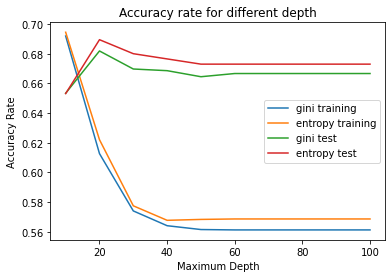

In [85]:
plt.plot(depth_lst, train_score_lst[0], label = 'gini training')
plt.plot(depth_lst, train_score_lst[1], label = 'entropy training')
plt.plot(depth_lst, test_score_lst[0], label = 'gini test')
plt.plot(depth_lst, test_score_lst[1], label = 'entropy test')

#plt.plot(depth_lst, score_lst[2], label = 'log_loss')
plt.title('Accuracy rate for different depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy Rate')
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig('DecisionTree1.png')

In [87]:

treeclf = DecisionTreeClassifier(max_depth=40,criterion='entropy',random_state=0)
#treeovr = OneVsRestClassifier(treeclf)

treeclf.fit(new_train_set, train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=40, random_state=0)

In [92]:
from matplotlib import pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(30,22), dpi=500)
tree.plot_tree(treeclf)
fig.savefig('imagename.png')

Error in callback <function flush_figures at 0x7f6fb71e1a60> (for post_execute):


KeyboardInterrupt: ignored

In [88]:
from sklearn import metrics

predict_y = treeclf.predict(validation_set)
print("Accuracy:",metrics.accuracy_score(validation_respond, predict_y))

Accuracy: 0.68456


In [91]:
print(treeclf.tree_.node_count)

29981


In [93]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(validation_respond, predict_y)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(validation_respond, predict_y)))

print('Micro Precision: {:.2f}'.format(precision_score(validation_respond, predict_y, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(validation_respond, predict_y, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(validation_respond, predict_y, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(validation_respond, predict_y, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(validation_respond, predict_y, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(validation_respond, predict_y, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(validation_respond, predict_y, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(validation_respond, predict_y, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(validation_respond, predict_y, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(validation_respond, predict_y, target_names=['Class 1', 'Class 2', 'Class 3']))

Confusion Matrix

[[1463  879   71]
 [ 767 4659 1059]
 [  56 1111 2435]]

Accuracy: 0.68

Micro Precision: 0.68
Micro Recall: 0.68
Micro F1-score: 0.68

Macro Precision: 0.67
Macro Recall: 0.67
Macro F1-score: 0.67

Weighted Precision: 0.68
Weighted Recall: 0.68
Weighted F1-score: 0.68

Classification Report

              precision    recall  f1-score   support

     Class 1       0.64      0.61      0.62      2413
     Class 2       0.70      0.72      0.71      6485
     Class 3       0.68      0.68      0.68      3602

    accuracy                           0.68     12500
   macro avg       0.67      0.67      0.67     12500
weighted avg       0.68      0.68      0.68     12500



In [94]:
cm_df = pd.DataFrame(confusion,
                     index = ['Good','Standard','Poor'], 
                     columns = ['Good','Standard','Poor'])

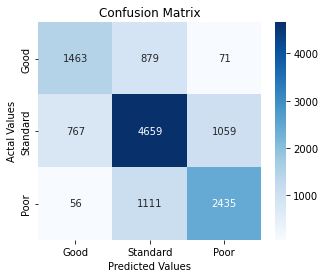

In [98]:
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot = True,cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
fig1 = plt.gcf()
plt.show()
fig1.savefig('Confustionmatrix1.png')

## Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
# 77
n_estimator = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
criterion_list = ['gini', 'entropy']
#randfclf = BaggingClassifier()
train_score_lst = []
test_score_lst = []
for item in ['gini', 'entropy']:
  train_lst = []
  test_lst = []
  for i in depth_lst:
    treeclf = RandomForestClassifier(n_estimators = i, criterion = item)
    scores=cross_val_score(estimator = treeclf,X=new_train_set,y =train_y,cv = 10)
    # for validation set
    treeclf.fit(new_train_set, train_y)
    predict_y = treeclf.predict(validation_set)
    test_lst.append(metrics.accuracy_score(validation_respond, predict_y))
    print(scores)
    print(np.mean(scores))
    train_lst.append(np.mean(scores))
  #plt.plot(depth_lst, item_lst)

train_score_lst.append(train_lst)
test_score_lst.append(test_lst)

[0.66925714 0.6704     0.67074286 0.66491429 0.66377143 0.67337143
 0.66937143 0.64788571 0.67462857 0.6776    ]
0.6681942857142856
[0.67737143 0.67805714 0.67862857 0.68297143 0.68217143 0.68605714
 0.68057143 0.6648     0.69748571 0.69348571]
0.68216
[0.68228571 0.6848     0.69222857 0.69165714 0.6896     0.69154286
 0.68114286 0.67165714 0.69497143 0.70445714]
0.6884342857142858
[0.68434286 0.69565714 0.6904     0.68834286 0.6904     0.70491429
 0.68788571 0.6776     0.69165714 0.70925714]
0.6920457142857143
[0.69017143 0.68731429 0.69748571 0.69154286 0.68982857 0.69737143
 0.68834286 0.67828571 0.69771429 0.71154286]
0.69296
[0.68982857 0.69085714 0.69691429 0.69611429 0.6936     0.70137143
 0.69348571 0.67691429 0.70034286 0.71222857]
0.6951657142857143
[0.68948571 0.68685714 0.69805714 0.6976     0.69428571 0.70514286
 0.69268571 0.67611429 0.70388571 0.71188571]
0.6956
[0.69382857 0.68788571 0.69805714 0.70091429 0.69177143 0.70457143
 0.68697143 0.6832     0.70205714 0.7108571

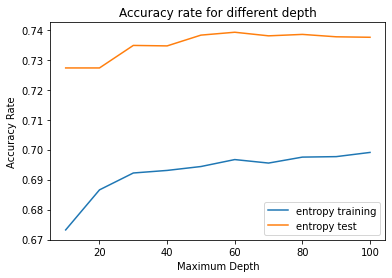

In [80]:
plt.plot(depth_lst, train_score_lst[0], label = 'entropy training')
#plt.plot(depth_lst, train_score_lst[1], label = 'entropy training')
plt.plot(depth_lst, test_score_lst[0], label = 'entropy test')
#plt.plot(depth_lst, test_score_lst[1], label = 'entropy test')

#plt.plot(depth_lst, score_lst[2], label = 'log_loss')
plt.title('Accuracy rate for different depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy Rate')
plt.legend()
fig1 = plt.gcf()
plt.show()
fig1.savefig('randomforest1.png')

In [109]:
treeclf = RandomForestClassifier(n_estimators = 60, criterion = 'entropy')
treeclf.fit(new_train_set, train_y)

In [112]:
fig = plt.figure(figsize=(30,22), dpi=500)
tree.plot_tree(treeclf[0])
fig.savefig('imagename1.png')

Error in callback <function flush_figures at 0x7f6fb71e1a60> (for post_execute):


KeyboardInterrupt: ignored

In [113]:
predict_y = treeclf.predict(validation_set)
print("Accuracy:",metrics.accuracy_score(validation_respond, predict_y))

Accuracy: 0.7376


In [106]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(validation_respond, predict_y)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(validation_respond, predict_y)))

print('Micro Precision: {:.2f}'.format(precision_score(validation_respond, predict_y, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(validation_respond, predict_y, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(validation_respond, predict_y, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(validation_respond, predict_y, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(validation_respond, predict_y, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(validation_respond, predict_y, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(validation_respond, predict_y, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(validation_respond, predict_y, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(validation_respond, predict_y, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(validation_respond, predict_y, target_names=['Class 1', 'Class 2', 'Class 3']))

Confusion Matrix

[[1569  838    6]
 [ 588 4911  986]
 [  20  821 2761]]

Accuracy: 0.74

Micro Precision: 0.74
Micro Recall: 0.74
Micro F1-score: 0.74

Macro Precision: 0.73
Macro Recall: 0.72
Macro F1-score: 0.73

Weighted Precision: 0.74
Weighted Recall: 0.74
Weighted F1-score: 0.74

Classification Report

              precision    recall  f1-score   support

     Class 1       0.72      0.65      0.68      2413
     Class 2       0.75      0.76      0.75      6485
     Class 3       0.74      0.77      0.75      3602

    accuracy                           0.74     12500
   macro avg       0.73      0.72      0.73     12500
weighted avg       0.74      0.74      0.74     12500



In [107]:
cm_df = pd.DataFrame(confusion,
                     index = ['Good','Standard','Poor'], 
                     columns = ['Good','Standard','Poor'])

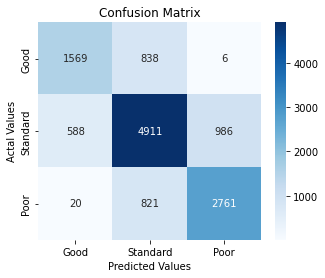

In [108]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot = True,cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
fig1 = plt.gcf()
plt.show()
fig1.savefig('Confustionmatrix2.png')

## Support Vector Machine